# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/tips.csv).

In [12]:
import urllib.request

url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/tips.csv' # URL của tập tin cần đọc
data = pd.read_csv(url)   # Đọc dữ liệu tại URL

### Step 3. Assign it to a variable called tips

In [13]:
tips = data
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [14]:
tips.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

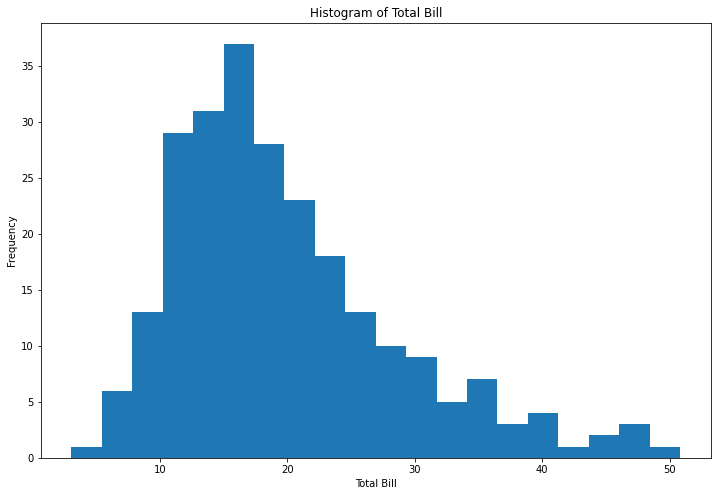

In [18]:
# Vẽ biểu đồ histogram cho cột "total_bill"

plt.figure(figsize = (12, 8))
plt.hist(tips['total_bill'], bins=20)
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

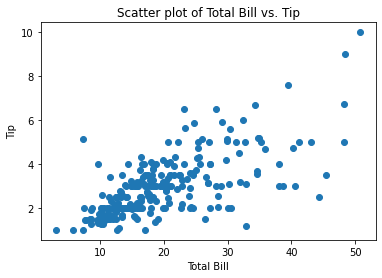

In [19]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter plot of Total Bill vs. Tip')
plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

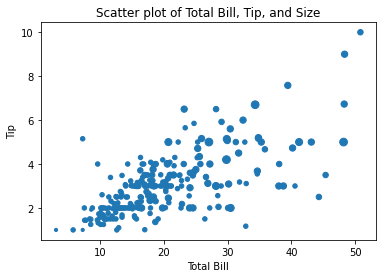

In [20]:
plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter plot of Total Bill, Tip, and Size')
plt.show()

### Step 8. Present the relationship between days and total_bill value

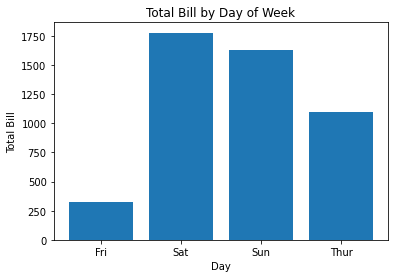

In [21]:
total_by_day = tips.groupby('day').sum()['total_bill']

# Vẽ biểu đồ cột cho tổng số tiền hóa đơn theo từng ngày trong tuần
plt.bar(total_by_day.index, total_by_day.values)
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Total Bill by Day of Week')
plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

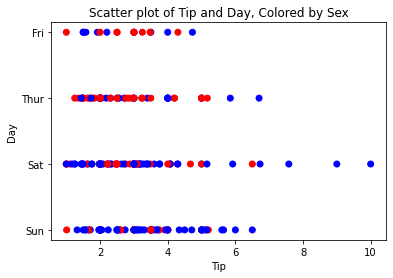

In [22]:
# Vẽ biểu đồ scatter plot cho cột "tip" và cột "day", và phân biệt các điểm bằng giá trị của cột "sex"
plt.scatter(tips['tip'], tips['day'], c=tips['sex'].map({'Male': 'blue', 'Female': 'red'}))
plt.xlabel('Tip')
plt.ylabel('Day')
plt.title('Scatter plot of Tip and Day, Colored by Sex')
plt.show()

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

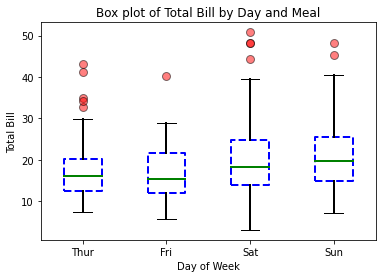

In [23]:
# Tạo một DataFrame mới với chỉ các dòng có giá trị "Lunch" hoặc "Dinner" trong cột "time"
tips_lunch_dinner = tips[tips['time'].isin(['Lunch', 'Dinner'])]

# Vẽ biểu đồ box plot cho tổng số tiền hóa đơn theo từng ngày trong tuần, và phân biệt giữa các bữa ăn
plt.boxplot([tips_lunch_dinner[tips_lunch_dinner['day'] == 'Thur']['total_bill'],
             tips_lunch_dinner[tips_lunch_dinner['day'] == 'Fri']['total_bill'],
             tips_lunch_dinner[tips_lunch_dinner['day'] == 'Sat']['total_bill'],
             tips_lunch_dinner[tips_lunch_dinner['day'] == 'Sun']['total_bill']],
            labels=['Thur', 'Fri', 'Sat', 'Sun'],
            boxprops=dict(linestyle='--', linewidth=2, color='blue'),
            whiskerprops=dict(linestyle='-', linewidth=2, color='black'),
            flierprops=dict(marker='o', markersize=8, markerfacecolor='red', alpha=0.5),
            medianprops=dict(linestyle='-', linewidth=2, color='green'))
plt.xlabel('Day of Week')
plt.ylabel('Total Bill')
plt.title('Box plot of Total Bill by Day and Meal')
plt.show()

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

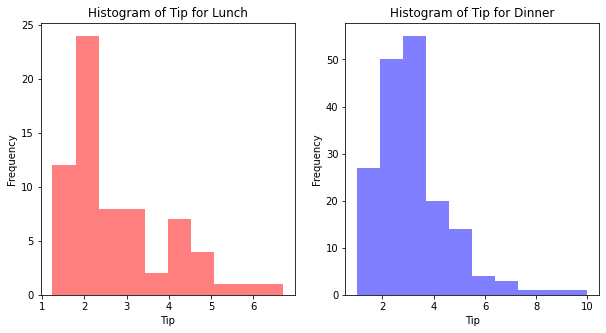

In [24]:
# Tạo một DataFrame mới với chỉ các dòng có giá trị "Lunch" hoặc "Dinner" trong cột "time"
tips_lunch_dinner = tips[tips['time'].isin(['Lunch', 'Dinner'])]

# Tạo hai subplot và vẽ hai biểu đồ histogram
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].hist(tips_lunch_dinner[tips_lunch_dinner['time'] == 'Lunch']['tip'], bins=10, color='red', alpha=0.5)
axs[0].set_xlabel('Tip')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Tip for Lunch')
axs[1].hist(tips_lunch_dinner[tips_lunch_dinner['time'] == 'Dinner']['tip'], bins=10, color='blue', alpha=0.5)
axs[1].set_xlabel('Tip')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Tip for Dinner')
plt.show()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

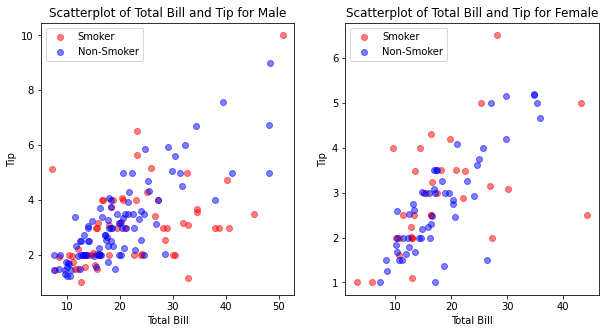

In [25]:
# Tạo hai subplot và vẽ hai biểu đồ scatterplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].scatter(tips[(tips['sex'] == 'Male') & (tips['smoker'] == 'Yes')]['total_bill'],
               tips[(tips['sex'] == 'Male') & (tips['smoker'] == 'Yes')]['tip'],
               color='red', alpha=0.5, label='Smoker')
axs[0].scatter(tips[(tips['sex'] == 'Male') & (tips['smoker'] == 'No')]['total_bill'],
               tips[(tips['sex'] == 'Male') & (tips['smoker'] == 'No')]['tip'],
               color='blue', alpha=0.5, label='Non-Smoker')
axs[0].set_xlabel('Total Bill')
axs[0].set_ylabel('Tip')
axs[0].set_title('Scatterplot of Total Bill and Tip for Male')
axs[0].legend()
axs[1].scatter(tips[(tips['sex'] == 'Female') & (tips['smoker'] == 'Yes')]['total_bill'],
               tips[(tips['sex'] == 'Female') & (tips['smoker'] == 'Yes')]['tip'],
               color='red', alpha=0.5, label='Smoker')
axs[1].scatter(tips[(tips['sex'] == 'Female') & (tips['smoker'] == 'No')]['total_bill'],
               tips[(tips['sex'] == 'Female') & (tips['smoker'] == 'No')]['tip'],
               color='blue', alpha=0.5, label='Non-Smoker')
axs[1].set_xlabel('Total Bill')
axs[1].set_ylabel('Tip')
axs[1].set_title('Scatterplot of Total Bill and Tip for Female')
axs[1].legend()
plt.show()

### BONUS: Create your own question and answer it using a graph.